# Summary

This notebook explores the ways to extract signal from .mp3 data.

In [1]:
import os
import pandas as pd
import notebook_utilities

drive_root = os.path.join("/", "mnt", "e")
data_path = os.path.join(drive_root, "fma_full")
metadata_dir = os.path.join(drive_root, "fma_metadata")
signal_path = os.path.join(drive_root, "fma_transformed")

# batch size for calculation
batch_size = 128


for file in os.listdir(metadata_dir):
    if "tracks_clean" in file:
        if file.split(".")[-1] == "parquet":
            tracks_clean = pd.read_parquet(f"{metadata_dir}/{file}").astype({'fma_track_id':'int64','name':'string', 'genre_top':'string', 'title.1': 'string'}).set_index("fma_track_id")
        else:
            tracks_clean = pd.read_csv(f"{metadata_dir}/{file}").astype({'fma_track_id':'int64','name':'string', 'genre_top':'string', 'title.1': 'string'}).set_index("fma_track_id")
        
        

tracks_clean.head()

,title.1,name,bit_rate,duration,genre_top
fma_track_id,,,,,
2,Food,AWOL,256000.0,168.0,Hip-Hop
3,Electric Ave,AWOL,256000.0,237.0,Hip-Hop
5,This World,AWOL,256000.0,206.0,Hip-Hop
10,Freeway,Kurt Vile,192000.0,161.0,Pop
134,Street Music,AWOL,256000.0,207.0,Hip-Hop


In [2]:

df = []

folder_name = os.path.basename(data_path)
file_list = os.listdir(data_path)


id_list = [int(x.split(".")[0]) for x in file_list]
for file_name, file_id in zip(file_list, id_list):
    df.append({
        "folder": folder_name,
        "file": file_name,
        "id": file_id,
        # "path": f"{data_path}/{folder_name}/{file_name}" FMA_FULL
        "path": f"{data_path}/{file_name}"
    })

df = pd.DataFrame(df)
df
# # Important, casting the index to same type
tracks_id_fs_locations = df.rename(columns={"id":"fma_track_id"}).set_index("fma_track_id").astype({'folder': 'string', 'file':'string', 'path':'string'})

tracks_id_fs_locations

,folder,file,path
fma_track_id,,,
2,fma_full,000002.mp3,/mnt/e/fma_full/000002.mp3
3,fma_full,000003.mp3,/mnt/e/fma_full/000003.mp3
5,fma_full,000005.mp3,/mnt/e/fma_full/000005.mp3
10,fma_full,000010.mp3,/mnt/e/fma_full/000010.mp3
20,fma_full,000020.mp3,/mnt/e/fma_full/000020.mp3
...,...,...,...
155316,fma_full,155316.mp3,/mnt/e/fma_full/155316.mp3
155317,fma_full,155317.mp3,/mnt/e/fma_full/155317.mp3
155318,fma_full,155318.mp3,/mnt/e/fma_full/155318.mp3


In [3]:
tracks_clean

,title.1,name,bit_rate,duration,genre_top
fma_track_id,,,,,
2,Food,AWOL,256000.0,168.0,Hip-Hop
3,Electric Ave,AWOL,256000.0,237.0,Hip-Hop
5,This World,AWOL,256000.0,206.0,Hip-Hop
10,Freeway,Kurt Vile,192000.0,161.0,Pop
134,Street Music,AWOL,256000.0,207.0,Hip-Hop
...,...,...,...,...,...
155266,I Find Myself in the Dark Woods,ps,256000.0,172.0,Electronic
155267,Take a Moment to Understand Your Internal Guid...,ps,256000.0,239.0,Electronic
155268,Air of a Certain Nervous Stillness,ps,256000.0,180.0,Electronic


In [4]:
tracks_with_paths = tracks_clean.join(tracks_id_fs_locations, how="left", rsuffix="tracks_id")
tracks_with_paths = tracks_with_paths[tracks_with_paths['path'].notna()]
tracks_with_paths

,title.1,name,bit_rate,duration,genre_top,folder,file,path
fma_track_id,,,,,,,,
2,Food,AWOL,256000.0,168.0,Hip-Hop,fma_full,000002.mp3,/mnt/e/fma_full/000002.mp3
3,Electric Ave,AWOL,256000.0,237.0,Hip-Hop,fma_full,000003.mp3,/mnt/e/fma_full/000003.mp3
5,This World,AWOL,256000.0,206.0,Hip-Hop,fma_full,000005.mp3,/mnt/e/fma_full/000005.mp3
10,Freeway,Kurt Vile,192000.0,161.0,Pop,fma_full,000010.mp3,/mnt/e/fma_full/000010.mp3
134,Street Music,AWOL,256000.0,207.0,Hip-Hop,fma_full,000134.mp3,/mnt/e/fma_full/000134.mp3
...,...,...,...,...,...,...,...,...
155266,I Find Myself in the Dark Woods,ps,256000.0,172.0,Electronic,fma_full,155266.mp3,/mnt/e/fma_full/155266.mp3
155267,Take a Moment to Understand Your Internal Guid...,ps,256000.0,239.0,Electronic,fma_full,155267.mp3,/mnt/e/fma_full/155267.mp3
155268,Air of a Certain Nervous Stillness,ps,256000.0,180.0,Electronic,fma_full,155268.mp3,/mnt/e/fma_full/155268.mp3


In [5]:
tracks_amount = 250
genres = list(tracks_with_paths['genre_top'].unique())

print("available genres are:", genres)
print("available records to process: ", tracks_with_paths['genre_top'].value_counts().to_dict())

selected = pd.DataFrame(columns=tracks_with_paths.columns)




result = pd.concat(tracks_with_paths[tracks_with_paths['genre_top'] == i][:tracks_amount] for i in genres)

print("records that will be processed with provided tracks_amount: ", result['genre_top'].value_counts().to_dict())


available genres are: ['Hip-Hop', 'Pop', 'Rock', 'Electronic', 'Classical']
available records to process:  {'Rock': 19002, 'Electronic': 14242, 'Hip-Hop': 4824, 'Pop': 2687, 'Classical': 1663}
records that will be processed with provided tracks_amount:  {'Hip-Hop': 250, 'Pop': 250, 'Rock': 250, 'Electronic': 250, 'Classical': 250}


In [6]:
df = result
df = df[df['duration'].ge(15)]


# First artifact
notebook_utilities.save_dataset(metadata_dir, df, "tracks_data_with_paths")

df

,title.1,name,bit_rate,duration,genre_top,folder,file,path
fma_track_id,,,,,,,,
2,Food,AWOL,256000.0,168.0,Hip-Hop,fma_full,000002.mp3,/mnt/e/fma_full/000002.mp3
3,Electric Ave,AWOL,256000.0,237.0,Hip-Hop,fma_full,000003.mp3,/mnt/e/fma_full/000003.mp3
5,This World,AWOL,256000.0,206.0,Hip-Hop,fma_full,000005.mp3,/mnt/e/fma_full/000005.mp3
134,Street Music,AWOL,256000.0,207.0,Hip-Hop,fma_full,000134.mp3,/mnt/e/fma_full/000134.mp3
583,"WAR (If It Feels Good, Do It!)",DJ's of Mass Destruction,256000.0,134.0,Hip-Hop,fma_full,000583.mp3,/mnt/e/fma_full/000583.mp3
...,...,...,...,...,...,...,...,...
32045,Scrutiny,Aaron Siegel,261889.0,559.0,Classical,fma_full,032045.mp3,/mnt/e/fma_full/032045.mp3
32046,Re-imagining,Aaron Siegel,269904.0,819.0,Classical,fma_full,032046.mp3,/mnt/e/fma_full/032046.mp3
34306,J S Bach - Magnificat BWV 243 - Gloria Patri,The Tudor Consort,161915.0,145.0,Classical,fma_full,034306.mp3,/mnt/e/fma_full/034306.mp3


# Extracting the signal from raw audio data

In [7]:
import librosa
import time
import numpy as np
import librosa as li
import pandas as pd
from IPython.display import clear_output
import notebook_utilities


# Logging purposes
signal_extractions = []
appends_to_parquet = []
extractions = []


def extract_y_middle(path: str):
    """
    takes in path of a file, loads it, and returns a ndarray of samples
    """
    start_time = time.time()

    track = int(path.split("/")[-1].split(".")[0])
    print(f"{(track / 155278) * 100:.4f} %")
    print(f"track = {track}")


    try:
        y, sr = librosa.load(path)
        if notebook_utilities.assert_signal_length(y, sr, 14):
            try:
                # extract 14 * 22050
                y_minute = notebook_utilities.get_from_middle(y, sr, 14)

                # perform hanning window function on 2 seconds from start and the end
                y_minute = notebook_utilities.get_hanned(2, y_minute, 22050, False)

                # normalization [0.0:1.0]
                y_minute = notebook_utilities.normalize_audio(y_minute)

                # log purposes
                elapsed = time.time() - start_time
                extractions.append(elapsed)
                print(f"✅ Processed track {track} in {elapsed:.2f} seconds.")
                
                
                return pd.Series([track, y_minute.tolist()])
            except Exception as e:
                print(f"Error during slicing record {track}: {e}")
                return pd.Series([track, np.nan])
        else:
            print(f"Record {path} was not long enough.")
            return pd.Series([track, np.nan])
    except Exception as e:
        print(f"Error loading record {path}: {e}")
        return pd.Series([track, np.nan])

In [8]:
# deep copy needed for extract_y_middle udf
mock = tracks_with_paths.copy(deep=True)

def extract_f32_from_str(row: str) -> np.array:
    try:
        no_brackets = row[1:-1]
        splitted    = no_brackets.split(",")
        casted      = np.array(splitted, dtype=np.float32)
        
        return casted
    except Exception as e:
        print(f"lost in conversion. {e}")
        return np.array(np.nan)


def extract_signal_append_parquet(start, end, location, first: bool):
    start_time = time.time()

    print(f"Calculating for indexes: {start}, {end}")


    # this extract y udf is the expensive part
    output = mock['path'].iloc[start:end].apply(extract_y_middle)
    output.columns = ["genre_top","y_minute"]
    output['y'] = output['y_minute'].apply(extract_f32_from_str)

    output = output.dropna(subset=["y"])
    print(output.columns)
    output.columns = ["genre_top","y_minute", "y"]
    output = output.rename(columns={"genre_top":"genre"})

    output.head()

    elapsed = time.time() -  start_time 
    print(f"transformation time: {elapsed:.2f}")

    signal_extractions.append(elapsed)

    # append signals.parquet
    if first:
        output.to_parquet(f'{location}/signals.parquet', engine="fastparquet", compression="snappy")
    else:
        output.to_parquet(f'{location}/signals.parquet', engine="fastparquet", compression="snappy", append=True)


    elapsed = time.time() -  start_time 
    appends_to_parquet.append(elapsed)
    print(f"write time: {elapsed:.2f}")
    clear_output(wait=True)
    # output.to_parquet(f"G:\\artifacts_1sec\\{start_index}-{end}.parquet.gzip", compression="gzip")

    

In [ ]:
from IPython.display import clear_output

start_time = time.time()

for i in range(0, mock.shape[0] // batch_size + 1):
    if i == 0:
        start, end = 0, batch_size
        print("starting")
        extract_signal_append_parquet(start, end, signal_path, True)
        clear_output(wait=True)

    else:
        print("continuing")
        start, end = i * batch_size, (i+1) * batch_size
        print(start, end)
        extract_signal_append_parquet(start, end, signal_path, False)
        clear_output(wait=True)

end = time.time() - start_time

print(f"data transformation is finished, the data is under {signal_path}")

print(f"mp3 to nparray signal extractions avg {np.array(extractions).sum() / len(signal_extractions):.2f}s")

print(f"udf signal extractions avg {np.array(signal_extractions).sum() / len(signal_extractions):.2f}s")

print(f"appends to parquet avg {np.array(appends_to_parquet).sum() / len(appends_to_parquet):.2f}s")

print(f"whole operation {int(end // 60)}m{"{:.0f}".format(end % 60)}s")

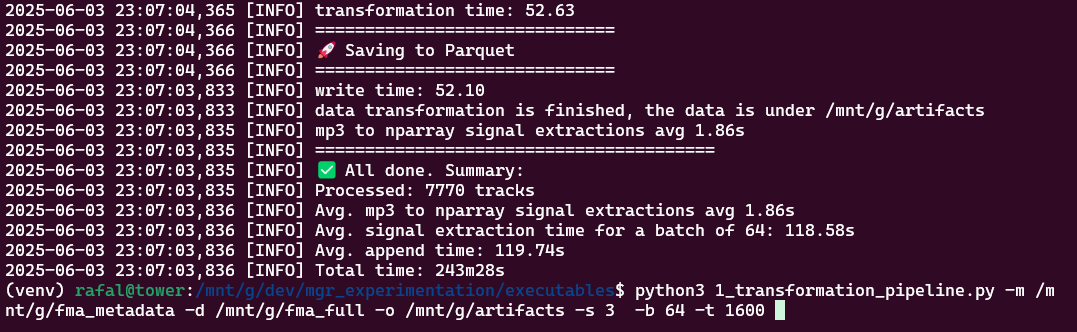

# This notebook is scripted with 1_transformation_pipeline.py